# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Nov 2017

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [4]:
pwd

'/Users/zirongwu/DataScience/DS501/BitTiger-DS501-1805/Homework/Yelp_Data_Challenge_Project/code'

In [5]:
cd ..

/Users/zirongwu/DataScience/DS501/BitTiger-DS501-1805/Homework/Yelp_Data_Challenge_Project


In [6]:
df = pd.read_csv('dataset/last_2_years_restaurant_reviews.csv')

In [7]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-02,0,UgwmWy_68S_aKR9wTWKGOg,3,I am a huge fan of both locally owned business...,4,jSD05fFrAFa5gX3ZQae1tw
1,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,2,2015-06-08,2,AywPsODuQbUMhBEjmKiGXw,1,Let me start off by saying. If you cant make a...,8,oagZh5A2cWJXZBLakS_KpQ
2,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-08,0,6j39TEUBDBTEK37OKACWLw,1,Decent product. ..HORRIBLE service. Totally un...,2,6BSwuyc7fvcccJgrY4_W5Q
3,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-07-03,0,c6iTbCMMYWnOd79ZiWwobg,1,"I ordered a few 12 inch sandwiches , a turkey ...",1,ih7Dmu7wZpKVwlBRbakJOQ
4,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2018-03-10,0,5iDdZvpK4jOv2w5kZ15TUA,1,Worst subway of any I have visited. I have man...,1,m3WBc9bGxn1q1ikAFq8PaA


In [8]:
df.funny.value_counts()

0      528517
1       66009
2       19937
3        8584
4        4676
5        3018
6        2043
7        1515
8        1133
9         844
10        620
11        537
12        377
13        323
14        273
15        259
16        215
17        167
19        144
18        143
20        131
21         97
22         93
23         90
24         85
25         68
26         67
27         57
28         57
32         48
        ...  
182         2
160         2
58          2
69          2
109         2
156         1
145         1
140         1
124         1
105         1
122         1
116         1
113         1
181         1
112         1
79          1
102         1
100         1
98          1
92          1
91          1
89          1
86          1
84          1
83          1
74          1
73          1
70          1
183         1
202         1
Name: funny, Length: 108, dtype: int64

## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [9]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df.text.values

In [10]:
documents

array(["I am a huge fan of both locally owned businesses and cupcakes.  Cakes By Toi combines these loves with an okay result.  I decided to stop by on my way home after a long day at work, and after telling myself repeatedly I would stop in and try this place.\n\nIt is in your typical small strip mall.  Walking up it appeared they may also sell some sort of Thai food for lunch although when I walked in I only saw the bakery area. The interior is very plain, which is fine as I was there for the cupcakes. Sprucing it up a bit wouldn't hurt. They had a couple cases that had cupcakes and cakes ready to go.  The staff behind the counter were very friendly, and I got the sense by the ages that it may be members of the family all working there.\n\nThe cupcake, the most important thing, were okay.  There were reasonably priced, especially compared to certain designer cupcake bakeries.  I purchased half a dozen to share with the family.  The flavors were good as were a few of the frostings.  M

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [11]:
# Make a column and take the values, save to a variable named "target"
target = np.where(df.stars <= 4, 0, 1)

#### You may want to look at the statistic of the target variable

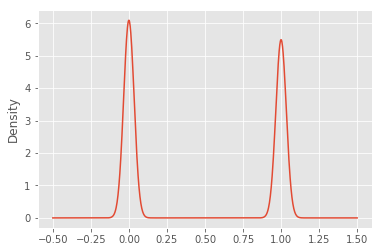

In [12]:
# To be implemented
pd.Series(target, name = 'target').plot.density();

### Create training dataset and test dataset

In [13]:
from sklearn.cross_validation import train_test_split

/Users/zirongwu/Documents/py3/py3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents.shape
X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size = .7, random_state = 42)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [16]:
wordnet = WordNetLemmatizer()

# lemmatize
def lemmatize(doc):
    return [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

In [17]:
newstopwords = ['!', '#', '$', '%', '&', "'", "''", "'d", "'ll", "'m", "'re", "'s", "'ve", '(', ')', '*', '+', ',', '-', '--',
                 '.', '..','...','/','1','1.','1/2','10','100','11','12','13',
                 '14','15','16','18','1st','2','2.','20',
                 '24','25','2nd','3','3.','3.5','30',
                 '35','3rd','4','4.','4/5','40','45','5','5/5','50','6','60','7','8',
                 '9','90',':',';','=','?',
                 '@','``']

In [18]:
print(newstopwords)

['!', '#', '$', '%', '&', "'", "''", "'d", "'ll", "'m", "'re", "'s", "'ve", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '/', '1', '1.', '1/2', '10', '100', '11', '12', '13', '14', '15', '16', '18', '1st', '2', '2.', '20', '24', '25', '2nd', '3', '3.', '3.5', '30', '35', '3rd', '4', '4.', '4/5', '40', '45', '5', '5/5', '50', '6', '60', '7', '8', '9', '90', ':', ';', '=', '?', '@', '``']


In [19]:
stopword = stopwords.words('english')

In [20]:
stopword.extend(newstopwords)

In [21]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = stopword, max_features=2000,
                                  tokenizer = lemmatize)

In [22]:
# Train the model with your training data
X_train_vect = vectorizer.fit_transform(X_train).todense()

In [23]:
# Get the vocab of your tfidf
terms = vectorizer.get_feature_names()

In [24]:
# Use the trained model to transform all the reviews
X_test_vect = vectorizer.transform(X_test).todense()

In [25]:
document = vectorizer.transform(documents).todense()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [26]:
# To be implemented
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(random_state=42)

kmeans.fit(X_train_vect)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

## Make predictions on all your data

In [28]:
kmeans.predict(document)

array([2, 1, 2, ..., 7, 2, 1], dtype=int32)

In [28]:
assigned_cluster = kmeans.transform(X_train_vect).argmin(axis = 1)

In [29]:
assigned_cluster

array([2, 0, 0, ..., 1, 7, 4])

In [30]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X_train_vect.shape[0])[assigned_cluster == i]
    sample_articles = np.random.choice(cluster, 3, replace = False)
    print('cluster %d:' % i)
    for article in sample_articles:
        print('   Name: %s \n Category: %s' % (df.loc[article]['name'], df.loc[article]['categories']))

cluster 0:
   Name: Black Bear Diner 
 Category: Breakfast & Brunch, American (Traditional), Restaurants, Diners
   Name: Dragon Grille 
 Category: Food, Restaurants, Asian Fusion, Food Trucks
   Name: Hooters 
 Category: Sports Bars, Chicken Wings, American (New), Burgers, American (Traditional), Restaurants, Nightlife, Bars
cluster 1:
   Name: Jamms Restaurant 
 Category: Breakfast & Brunch, American (Traditional), Restaurants, American (New)
   Name: Leoné Café 
 Category: Cafes, Restaurants, Coffee & Tea, Food, Breakfast & Brunch, Italian
   Name: Hearthstone Kitchen & Cellar 
 Category: Food, Beer, Wine & Spirits, Lounges, American (New), Tapas/Small Plates, Wine Bars, Breakfast & Brunch, Restaurants, Bars, Nightlife, Tapas Bars
cluster 2:
   Name: Shish Kabob House 
 Category: Middle Eastern, Restaurants, Mediterranean
   Name: Las Delicias De Las Vegas 
 Category: Restaurants, Mexican
   Name: Capriotti's Sandwich Shop 
 Category: Restaurants, Sandwiches
cluster 3:
   Name: Isla

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [31]:
# To be implemented
kmeans.cluster_centers_[:, 0]

array([0.00077605, 0.00071212, 0.00053046, 0.00074891, 0.00015845,
       0.00016871, 0.00026903, 0.00063233])

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [35]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster with 2000 max features:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(terms[i] for i in centroid)))

top features for each cluster with 2000 max features:
0: burger, fry, wa, good, shake, n't, place, cheese, great, food
1: wa, n't, u, order, food, minute, time, get, service, table
2: food, place, good, wa, n't, best, vega, like, service, time
3: pizza, wa, crust, slice, good, place, great, n't, cheese, topping
4: love, always, place, food, great, time, good, service, favorite, friendly
5: great, food, service, wa, place, amazing, good, back, awesome, friendly
6: sushi, roll, wa, place, ayce, great, good, fresh, service, n't
7: wa, good, food, n't, service, place, ordered, chicken, really, great


In [36]:
# To be implemented
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(8):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
        print

Cluster 0:
 burger
 fry
 wa
 good
 shake
 n't
 place
 cheese
 great
 food
Cluster 1:
 wa
 n't
 u
 order
 food
 minute
 time
 get
 service
 table
Cluster 2:
 food
 place
 good
 wa
 n't
 best
 vega
 like
 service
 time
Cluster 3:
 pizza
 wa
 crust
 slice
 good
 place
 great
 n't
 cheese
 topping
Cluster 4:
 love
 always
 place
 food
 great
 time
 good
 service
 favorite
 friendly
Cluster 5:
 great
 food
 service
 wa
 place
 amazing
 good
 back
 awesome
 friendly
Cluster 6:
 sushi
 roll
 wa
 place
 ayce
 great
 good
 fresh
 service
 n't
Cluster 7:
 wa
 good
 food
 n't
 service
 place
 ordered
 chicken
 really
 great


#### Try different k
If you set k == to a different number, how does the top features change?

In [37]:
# new k = 5
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_train_vect)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [38]:
# get a sample
y = X_test_vect[100]
clusters = kmeans5.transform(y).argmin(axis = 1)
clusters

array([0])

In [39]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(terms[i] for i in centroid)))

top features for each cluster with 1000 max features:
0: burger, fry, wa, good, shake, n't, place, cheese, great, food
1: wa, n't, u, order, food, minute, time, get, service, table
2: food, place, good, wa, n't, best, vega, like, service, time
3: pizza, wa, crust, slice, good, place, great, n't, cheese, topping
4: love, always, place, food, great, time, good, service, favorite, friendly
5: great, food, service, wa, place, amazing, good, back, awesome, friendly
6: sushi, roll, wa, place, ayce, great, good, fresh, service, n't
7: wa, good, food, n't, service, place, ordered, chicken, really, great


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640718 entries, 0 to 640717
Data columns (total 11 columns):
name          640718 non-null object
categories    640718 non-null object
avg_stars     640718 non-null float64
cool          640718 non-null int64
date          640718 non-null object
funny         640718 non-null int64
review_id     640718 non-null object
stars         640718 non-null int64
text          640718 non-null object
useful        640718 non-null int64
user_id       640718 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 53.8+ MB


In [41]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
top20res = df.name.value_counts()[:20].index.tolist()

In [42]:
df_top_restaurant = df[df.name.isin(top20res)]

In [43]:
df_top_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56813 entries, 5498 to 640012
Data columns (total 11 columns):
name          56813 non-null object
categories    56813 non-null object
avg_stars     56813 non-null float64
cool          56813 non-null int64
date          56813 non-null object
funny         56813 non-null int64
review_id     56813 non-null object
stars         56813 non-null int64
text          56813 non-null object
useful        56813 non-null int64
user_id       56813 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 5.2+ MB


We can also load restaurant profile information from the business dataset (optional)

In [ ]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)


### Vectorize the text feature

In [ ]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
pass

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [ ]:
# To be implemented
pass

#### Check the statistic of the target variable

In [ ]:
# To be implemented
pass

### Create training dataset and test dataset

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
pass

### Get NLP representation of the documents

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create TfidfVectorizer, and name it vectorizer
pass

In [ ]:
# Train the model with your training data
pass

In [ ]:
# Get the vocab of your tfidf
pass

In [ ]:
# Use the trained model to transform the test data
pass

In [ ]:
# Use the trained model to transform all the data
pass

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [ ]:
# To be implemented
pass

#### Make predictions on all your data

In [ ]:
# To be implemented
pass

#### Inspect the centroids

In [ ]:
# To be implemented
pass

#### Find the top 10 features for each cluster.

In [ ]:
# To be implemented
pass

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [ ]:
# To be implemented
pass

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [29]:
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()


In [30]:
X_train_scaled = scaler.fit_transform(X_train_vect)
X_test_scaled = scaler.fit_transform(X_test_vect)

### Use PCA to transform data (train and test) and get princial components

In [31]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

In [32]:
# set up the pca
pca = PCA(n_components= n_components)
train_components = pca.fit_transform(X_train_scaled)
test_components = pca.transform(X_test_scaled)

### See how much (and how much percentage of) variance the principal components explain

Text(0,0.5,'Variance Explained')

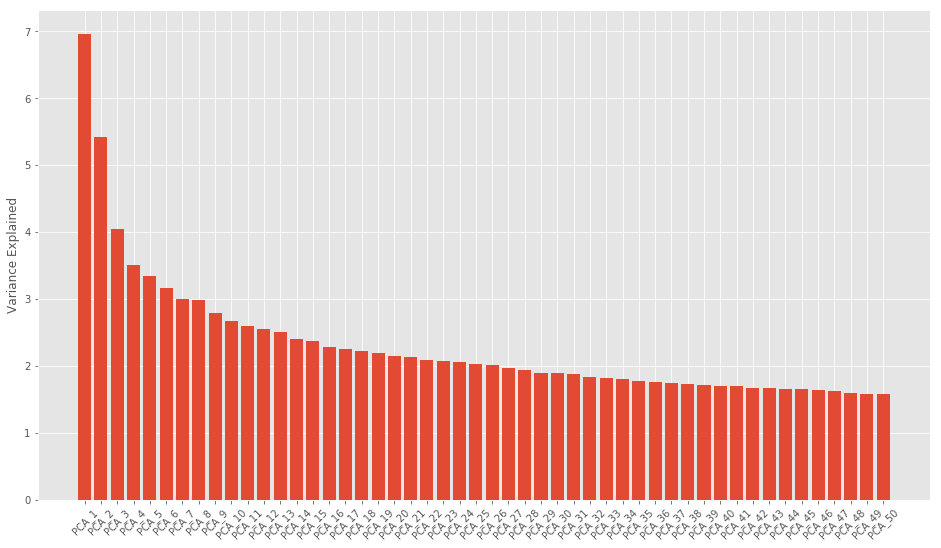

In [33]:
# gather the variance
pca_range = np.arange(n_components) + 1
# create the names for pca components
pca_names = ['PCA_%s' % i for i in pca_range]
# plot the bar charts
plt.figure(figsize = (16, 9))
plt.bar(pca_range, pca.explained_variance_, align = 'center')

xticks = plt.xticks(pca_range, pca_names, rotation = 45)

plt.ylabel('Variance Explained')

Text(0,0.5,'Proportion of Variance Explained')

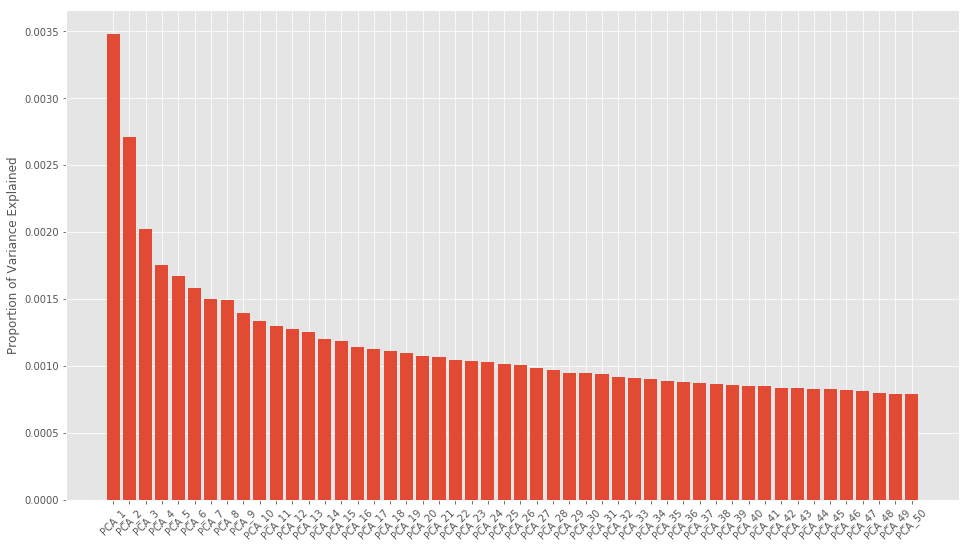

In [34]:
# gather the variance
pca_range = np.arange(n_components) + 1
# create the names for pca components
pca_names = ['PCA_%s' % i for i in pca_range]
# plot the bar charts
plt.figure(figsize = (16, 9))
plt.bar(pca_range, pca.explained_variance_ratio_, align = 'center')

xticks = plt.xticks(pca_range, pca_names, rotation = 45)

plt.ylabel('Proportion of Variance Explained')

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

Text(0,0.5,'Proportion of Variance Explained')

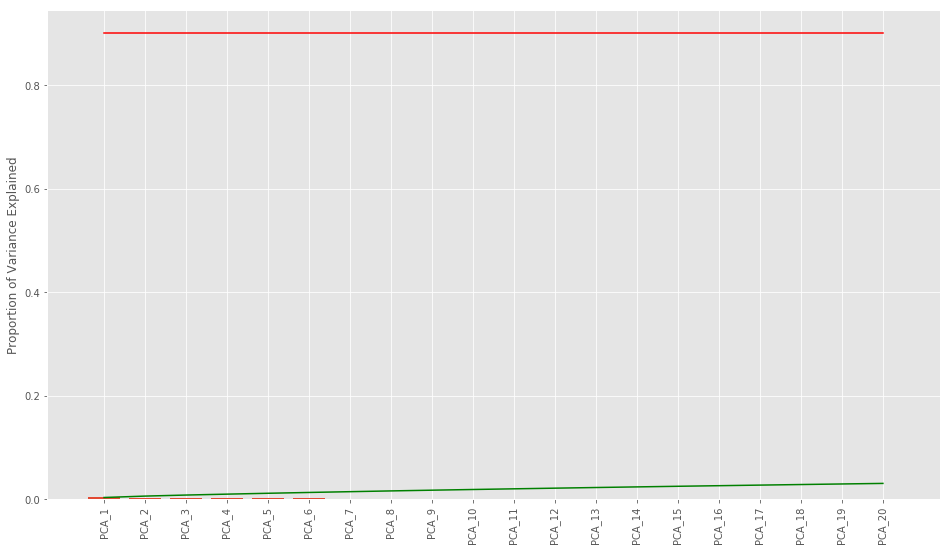

In [35]:
# To be implemented
pca_range = np.arange(20) + 1

pca_names = ['PCA_%s' % i for i in pca_range]
plt.figure(figsize = (16, 9))
plt.bar(pca_range, pca.explained_variance_ratio_[:20], align='center')
plt.plot(pca_range, np.cumsum(pca.explained_variance_ratio_[:20]), 'g-')
plt.plot(pca_range, 0.9*np.ones(len(pca_range)), 'r-')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Proportion of Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [36]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# set up the logisticregression
clf_lr_reg = LogisticRegression()

In [37]:
# Get score for training set
clf_lr_reg.fit(X_train_vect, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
clf_lr_reg.score(X_train_vect, y_train)

0.8366048435345836

In [39]:
# Get score for test set
clf_lr_reg.score(X_test_vect, y_test)

0.8311449421742998

#### Use (Stardardized + PCA) tf-idf vectors as features

In [40]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

clf_lr.fit(train_components, y_train)

NameError: name 'clf_lr' is not defined

In [ ]:
# Get score for training set
clf_lr.score(train_components, y_train)

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
clf_lr.score(test_components, y_test)

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: Without PCA, the training score is a little bit higher than test score. With PCA, the training score is very close to test score.

#### You can plot the coefficients against principal components


In [ ]:
features = clf_lr_reg.coef_.argsort()[:,-1:-11:-1]
features.shape[1]

In [ ]:
feature_range = np.arange(features.shape[1])

feature_names = ['%s' %terms[i] for i in features[0]]

plt.figure(figsize = (16, 9))
plt.bar(feature_names, features[0], align = 'center')

In [ ]:
features_pca = clf_lr.coef_.argsort()[:,-1:-11:-1]

In [ ]:
feature_pca_range = np.arange(features.shape[1])

feature_pca_names = ['pca_%s' %i for i in features[0]]

plt.figure(figsize = (16, 9))
plt.bar(feature_pca_names, features_pca[0], align = 'center')

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
clf_rf_reg = RandomForestClassifier(random_state = 42, max_depth=10)

clf_rf_reg.fit(X_train_vect, y_train)

In [ ]:
# Get score for training set
clf_rf_reg.score(X_train_vect, y_train)

In [ ]:
# Get score for test set
clf_rf_reg.score(X_test_vect, y_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
clf_rf = RandomForestClassifier(random_state = 42, max_depth = 10)

clf_rf.fit(train_components, y_train)

In [ ]:
# Get score for training set
clf_rf.score(train_components, y_train)

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
clf_rf.score(test_components, y_test)

#### Q: What do you see from the training result and the test result?

A: Without using PCA, the model got a lower score both in training and test. However, the scores are very close.

#### You can plot the feature importances against principal components


In [1]:
features_rf

NameError: name 'features_rf' is not defined

In [ ]:
features_rf = clf_rf_reg.feature_importances_.argsort()[::-1]
features_score = clf_rf_reg.feature_importances_[features_rf]
feature_rf_names = ['%s' %terms[i] for i in features_rf]

plt.figure(figsize = (16, 9))
plt.bar(feature_rf_names, features_score, align = 'center')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
# To be implemented

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented